# Titanic Survival Analysis on basis of Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

### Find missing values (null) in the Dataframe

In [4]:
train_null = train.isnull() # create a train_null DataFrame where null values are TRUE

In [7]:
train_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


### Create a heatmap of this train_null Dataframe to show (in yellow) which values are True = null

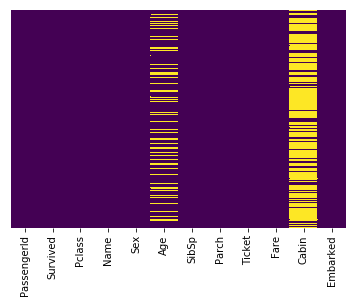

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

From  the heatmap is becomes clear that there is quite some data missing in the Age en Cabin column

There are some options to deal with the missing data if it is continuous. This is the case with "Age". We can fill the missing data for example by the mean age. But even better would it be to have the mean age per class. As there is very little Cabin date we will drop this coloumn 

We will write a function that will replace missing age data by the mean age of that class

In [35]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age     

In [36]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis=1)

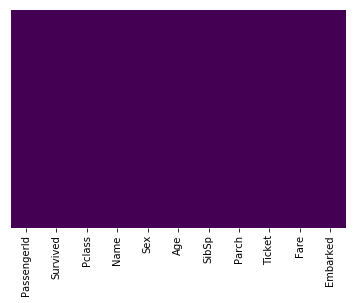

In [37]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [32]:
train.drop('Cabin', axis=1, inplace=True ) #drop the Cabin column

In [33]:
train.dropna(inplace=True) #remove all null values remaining the the dataset

### Deal with Categorical Features - Create Dummy variables

In [45]:
sex = pd.get_dummies(train ['Sex'], drop_first=True) #make an new DataFrame "sex" with only one column "male"1 or 0 for for the new 
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [46]:
train = pd.concat([train, sex, embark], axis=1)

In [48]:
train.drop(['Name','Sex','Ticket','Embarked'], axis=1, inplace=True )

In [49]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


The PassengerID column is also not valuable, so we will drop it also
train.drop(‘PassengerId’, axis=1, inplace=True )

Something interesting to note about the Pclass column is that it is a categorical column. You only can have class 1, 2 or 3. This means we also could have done pd.get_dummies on this column. There are differences for the Machine Learning Algorithm and we will explore this after we have completed this exercise. We will then discover how the Machine Learning algorithm will react on a category or continuous variable.


### Step 1: Create the y (predict value) and drop the predict label X

In [54]:
X_train = train.drop('Survived', axis=1)
y_train =train['Survived']

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logmodel = LogisticRegression()

In [58]:
logmodel.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
test = pd.read_csv("test.csv")

In [88]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [89]:
test_null = test.isnull() # create a train_null DataFrame where null values are TRUE

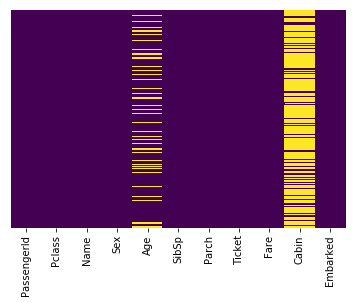

In [90]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [91]:
test.drop('Cabin', axis=1, inplace=True ) #drop the Cabin column

In [92]:
sextest = pd.get_dummies(test ['Sex'], drop_first=True) #make an new DataFrame "sex" with only one column "male"1 or 0 for for the new 
embarktest = pd.get_dummies(test['Embarked'],drop_first=True)

In [93]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [94]:
test = pd.concat([test, sextest, embarktest], axis=1)

In [95]:
test.drop(['Name','Sex','Ticket','Embarked'], axis=1, inplace=True )

In [80]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [81]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [97]:
test.dropna(inplace=True) #remove all null values remaining the the dataset

In [98]:
predictions = logmodel.predict(test)

In [99]:
from sklearn.metrics import classification_report

In [101]:
print(predictions)

[0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0
 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0]


In [102]:
print(len(predictions))

331


In [104]:
print(test.shape)

(331, 9)
